In [1]:
import numpy as np
import pandas as pd
import scipy as sp

/Users/focejames/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
%%file hw_data.csv
id,sex,weight,height
1,M,190,77
2,F,120,70
3,F,110,68
4,M,150,72
5,O,120,66
6,M,120,60
7,F,140,70

Writing hw_data.csv


# Python

## 1. Finish creating the following function that takes a list and returns the average value.

Add each element in the list to `total` and return `total`

### DO NOT use a library function nor `sum()`

In [4]:
def average(my_list):
    total = 0
    for item in my_list:
        total += item
    
    return total/len(my_list)

average([1,2,1,4,3,2,5,9])

3.375

## 2. Using a Dictionary keep track of the count of numbers (or items) from a list

In [5]:
def counts(my_list):
    counts = dict()
    for item in my_list:
        if item in counts:
            counts[item] += 1  
        else:
            counts[item] = 1 
    
    return counts

counts([1,2,1,4,3,2,5,9])    

{1: 2, 2: 2, 4: 1, 3: 1, 5: 1, 9: 1}

## 3.  Using the `counts()` function you created above and the `.split()` function, return a dictionary of most occuring words from the following paragraph. Bonus, remove punctuation from words.

In [7]:
import string

paragraph_text = '''
For a minute or two she stood looking at the house, and wondering what to do next, when suddenly a footman in livery came running out of the wood—(she considered him to be a footman because he was in livery: otherwise, judging by his face only, she would have called him a fish)—and rapped loudly at the door with his knuckles. It was opened by another footman in livery, with a round face, and large eyes like a frog; and both footmen, Alice noticed, had powdered hair that curled all over their heads. She felt very curious to know what it was all about, and crept a little way out of the wood to listen.
The Fish-Footman began by producing from under his arm a great letter, nearly as large as himself, and this he handed over to the other, saying, in a solemn tone, ‘For the Duchess. An invitation from the Queen to play croquet.’ The Frog-Footman repeated, in the same solemn tone, only changing the order of the words a little, ‘From the Queen. An invitation for the Duchess to play croquet.’
Then they both bowed low, and their curls got entangled together.
Alice laughed so much at this, that she had to run back into the wood for fear of their hearing her; and when she next peeped out the Fish-Footman was gone, and the other was sitting on the ground near the door, staring stupidly up into the sky.
Alice went timidly up to the door, and knocked.
‘There’s no sort of use in knocking,’ said the Footman, ‘and that for two reasons. First, because I’m on the same side of the door as you are; secondly, because they’re making such a noise inside, no one could possibly hear you.’ And certainly there was a most extraordinary noise going on within—a constant howling and sneezing, and every now and then a great crash, as if a dish or kettle had been broken to pieces.
‘Please, then,’ said Alice, ‘how am I to get in?’
‘There might be some sense in your knocking,’ the Footman went on without attending to her, ‘if we had the door between us. For instance, if you were inside, you might knock, and I could let you out, you know.’ He was looking up into the sky all the time he was speaking, and this Alice thought decidedly uncivil. ‘But perhaps he can’t help it,’ she said to herself; ‘his eyes are so very nearly at the top of his head. But at any rate he might answer questions.—How am I to get in?’ she repeated, aloud.
‘I shall sit here,’ the Footman remarked, ‘till tomorrow—’
At this moment the door of the house opened, and a large plate came skimming out, straight at the Footman’s head: it just grazed his nose, and broke to pieces against one of the trees behind him.'''

def word_counts(paragraph):
    translator = str.maketrans('', '', string.punctuation)
    words = paragraph.translate(translator).split()
    return counts(words)

word_freq = word_counts(paragraph_text)
word_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
word_df.sort_values(by='Frequency', ascending=False)

,Word,Frequency
9,the,32
11,and,16
14,to,15
1,a,15
25,of,9
...,...,...
121,together,1
122,laughed,1
124,much,1
125,run,1


## 4. Read in a file using `open()` and iterated through the file line-by-line write each line from the file to a new file in a  `title()`-ized. Create your own file for input

`This is the first line` ->  `This Is The First Line`

Hint: There's a function to do this

In [11]:
with open('input.txt', 'r') as file:
    for line in file:
        title_line = line.title()
        print(title_line)
        

The Quick Brown Fox Jumped Over The Lazy Dog 

Work Smarter Not Harder 

Ich Bin Ein Berliner


# Numpy

## 1. Given a list, find the average using a numpy function. 

In [12]:
simple_list = [1,2,1,4,3,2,5,9]
list_average = np.mean(simple_list)
list_average

3.375

## 2. Given two lists of Heights and Weights of individual, calculate the BMI of those individuals, without writing a `for-loop`

In [17]:
heights = [174, 173, 173, 175, 171]
weights = [88, 83, 92, 74, 77]

heights_in_meters = np.array(heights)/100
BMI = weights / heights_in_meters**2
print("BMI: ", BMI)

BMI:  [29.06592681 27.73229978 30.73941662 24.16326531 26.33288875]


## 3. Create an array of length 20 filled with random values (between 0 to 1) 

In [19]:
random_array = np.random.rand(20)

print(random_array)

[0.47954727 0.15195853 0.65549405 0.81118077 0.06080423 0.55176427
 0.91066031 0.05727561 0.97841571 0.73144234 0.23658244 0.34497206
 0.41342609 0.9588852  0.57969003 0.45487541 0.48738318 0.58277597
 0.79797924 0.47343767]


## 4. Create an array with at least 1000 random numbers from normal distributions (normal). Then, plot a histogram of these values (`plt.hist`).

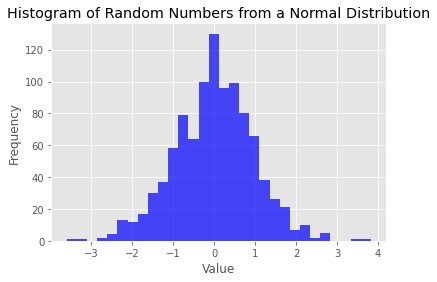

In [20]:
random_numbers = np.random.normal(loc=0, scale=1, size=1000)

plt.hist(random_numbers, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Random Numbers from a Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Pandas

## 1. Read in a CSV () and display all the columns and their respective data types 

In [21]:
df = pd.read_csv('hw_data.csv')
print(df.dtypes)
print(df)

id         int64
sex       object
weight     int64
height     int64
dtype: object
   id sex  weight  height
0   1   M     190      77
1   2   F     120      70
2   3   F     110      68
3   4   M     150      72
4   5   O     120      66
5   6   M     120      60
6   7   F     140      70


## 2. Find the average weight 

In [22]:
df['weight'].mean()

135.71428571428572

## 3. Find the Value Counts on column `sex` 

In [23]:
df['sex'].value_counts()

sex
M    3
F    3
O    1
Name: count, dtype: int64

## 4. Plot Height vs. Weight 

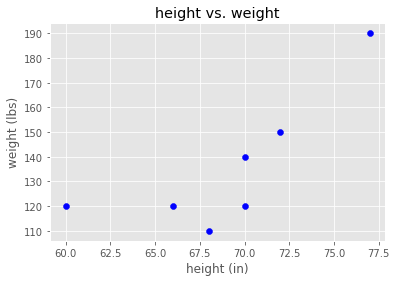

In [32]:
plt.scatter(df['height'], df['weight'], color='blue')
plt.title('height vs. weight')
plt.xlabel('height (in)')
plt.ylabel('weight (lbs)')
plt.grid(True)
plt.show()

## 5. Calculate BMI and save as a new column

In [33]:
df['height_m'] = df['height'] * 0.0254
df['weight_kg'] = df['weight'] * 0.453592
df['BMI'] = df['weight_kg'] / (df['height_m'] ** 2)
print(df)

   id sex  weight  height  height_m  weight_kg        BMI
0   1   M     190      77    1.9558   86.18248  22.530462
1   2   F     120      70    1.7780   54.43104  17.218016
2   3   F     110      68    1.7272   49.89512  16.725257
3   4   M     150      72    1.8288   68.03880  20.343432
4   5   O     120      66    1.6764   54.43104  19.368292
5   6   M     120      60    1.5240   54.43104  23.435634
6   7   F     140      70    1.7780   63.50288  20.087686


## 6. Save sheet as a new CSV file `hw_dataB.csv`

In [34]:
df.to_csv('hw_dataB.csv', index=False)

## Run the following (Mac)

In [35]:
!cat hw_dataB.csv

id,sex,weight,height,height_m,weight_kg,BMI
1,M,190,77,1.9558,86.18248,22.53046233196531
2,F,120,70,1.778,54.431039999999996,17.21801647684928
3,F,110,68,1.7271999999999998,49.89512,16.72525749895791
4,M,150,72,1.8288,68.0388,20.343431890567484
5,O,120,66,1.6764,54.431039999999996,19.368292180110533
6,M,120,60,1.524,54.431039999999996,23.43563353793374
7,F,140,70,1.778,63.50288,20.087685889657493


## Run the following (Windows) 

In [ ]:
!type hw_dataB.csv